In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

pd.set_option('display.float_format', '{:.2f}'.format)

# Leitura de Dados

In [3]:
df_profiles = pd.read_json(r'..\data\raw\profile_data.json')
df_posts = pd.read_json(r'..\data\raw\post_data.json')

# Gerar Dataframes com Quantitativas de Perfis
cols_int = df_profiles.columns[df_profiles.dtypes == 'int64']
cols = ['username'] + cols_int.tolist()
df_profiles_int = df_profiles[cols].copy()

# Gerar Dataframes com Quantitativas de Posts
cols_int = df_posts.columns[df_posts.dtypes == 'int64']
cols = ['ownerUsername', 'timestamp'] + cols_int.tolist()
df_posts_int = df_posts[cols].copy()

# Limpeza e Tratamento de Dados

Converter 'timestamp' p\ Data

In [4]:
df_posts_int['data_hora'] = pd.to_datetime(df_posts_int['timestamp'])

Agrupar Posts + Reels por 'ownerId' e 'ownerUsername'

In [6]:
df_posts_int_gruped = df_posts_int.groupby(['ownerId', 'ownerUsername']).agg(
    commentsSum=('commentsCount', 'sum'),
    likesSum=('likesCount', 'sum'),
    minData=('data_hora', 'min'),
    maxData=('data_hora', 'max'),
    count=('ownerId', 'count')
).reset_index()

df_posts_int_gruped.head()

,ownerId,ownerUsername,commentsSum,likesSum,minData,maxData,count
0,7999637,claudiocastrorj,19225,92799,2025-05-30 12:49:56+00:00,2025-06-13 14:03:13+00:00,30
1,18449431,nubialima,18,351,2025-06-11 20:29:03+00:00,2025-06-11 20:29:03+00:00,1
2,23552759,virginiamendesoficial,316,1545,2025-06-01 12:00:00+00:00,2025-06-12 11:30:00+00:00,3
3,38151300,valdetario,334,990,2025-05-27 15:07:35+00:00,2025-05-27 15:07:35+00:00,1
4,44117761,danibarbalho,166,2372,2025-06-12 11:07:03+00:00,2025-06-12 11:07:03+00:00,1


Calcular '% ENGAJAMENTO', 'RECENCIA' e 'FREQUENCIA'

In [7]:
df_profiles_posts_int = pd.merge(df_profiles_int, df_posts_int_gruped, left_on='id', right_on='ownerId', how='left').drop(['ownerId'], axis=1) 
df_profiles_posts_int['TOTAL ENGAJAMENTO'] = (df_profiles_posts_int['commentsSum'] + df_profiles_posts_int['likesSum'])
df_profiles_posts_int[r'% ENGAJAMENTO'] =  df_profiles_posts_int['TOTAL ENGAJAMENTO'] / df_profiles_posts_int['followersCount']
df_profiles_posts_int['RECENCIA'] = 1 / ((df_profiles_posts_int['maxData'].max() - df_profiles_posts_int['maxData']).dt.days + 1)
df_profiles_posts_int['FREQUENCIA'] = df_profiles_posts_int['count'] / ((df_profiles_posts_int['maxData'] - df_profiles_posts_int['minData']).dt.days + 1)
 

df_profiles_posts_int.head()

,username,id,followersCount,followsCount,highlightReelCount,igtvVideoCount,postsCount,fbid,ownerUsername,commentsSum,likesSum,minData,maxData,count,TOTAL ENGAJAMENTO,% ENGAJAMENTO,RECENCIA,FREQUENCIA
0,jeronimorodriguesba,12547733711,692137,3737,19,145,5246,17841412651338466,jeronimorodriguesba,3705,55140,2025-06-09 14:49:06+00:00,2025-06-14 01:04:19+00:00,30,58845,0.09,1.00,6.00
1,ibaneisoficial,8354690711,192018,3043,3,77,3301,17841408241354336,ibaneisoficial,18573,32693,2025-01-06 19:06:46+00:00,2025-06-13 13:29:00+00:00,29,51266,0.27,1.00,0.18
2,clecioluis_,214942370,159441,6121,7,428,6660,17841400911103358,clecioluis_,9188,55032,2025-06-05 16:56:03+00:00,2025-06-14 00:31:19+00:00,29,64220,0.40,1.00,3.22
3,ronaldocaiado,578026968,1373629,2814,10,439,10122,17841401289049032,ronaldocaiado,27323,419719,2024-08-14 15:37:54+00:00,2025-06-13 22:03:29+00:00,25,447042,0.33,1.00,0.08
4,gladsoncameli,1523264831,173518,6802,6,353,8851,17841400024953800,gladsoncameli,1781,36328,2025-05-27 02:44:55+00:00,2025-06-13 00:51:04+00:00,29,38109,0.22,0.50,1.71


In [8]:
df_profiles_posts_int.columns

Index(['username', 'id', 'followersCount', 'followsCount',
       'highlightReelCount', 'igtvVideoCount', 'postsCount', 'fbid',
       'ownerUsername', 'commentsSum', 'likesSum', 'minData', 'maxData',
       'count', 'TOTAL ENGAJAMENTO', '% ENGAJAMENTO', 'RECENCIA',
       'FREQUENCIA'],
      dtype='object')

# Análise de Perfil dos Concorrentes

Cor alterada com Sucesso!


NameError: name 'buffer' is not defined

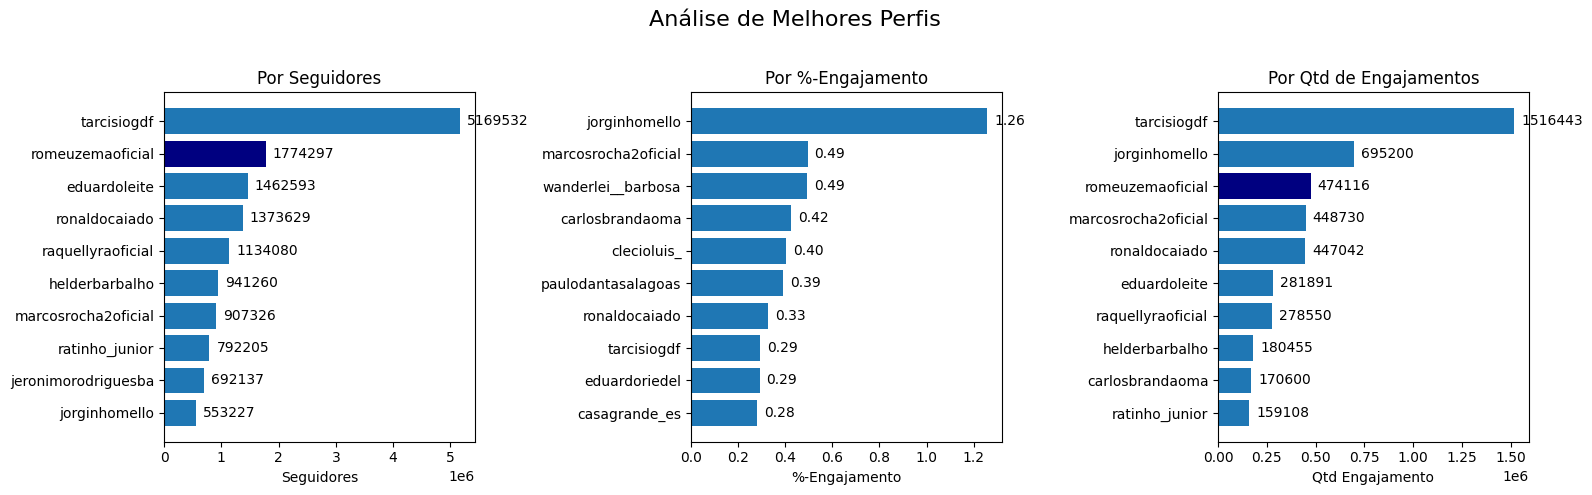

In [9]:
def plotarFigura(client_name):
    
    def plotarBarraSeguidores(client_name):
        
        # Calcular Estatísticas
        top_10_followers = df_profiles_posts_int.groupby('username')['followersCount'].sum().sort_values(ascending=True).tail(10).reset_index()
        
        # --- 4. Configuração do Primeiro Gráfico (Superior) ---
        # Preparar cores e rótulos para o primeiro gráfico
        cores1 = ['#1f77b4'] * 10 # Cor padrão para as barras
        try:
            # Encontra a posição (índice) do elemento X nos dados ordenados
            indice_x = top_10_followers.loc[top_10_followers['username'] == client_name].index[0]
            cores1[indice_x] = '#000080' # Cor de destaque para o elemento X
            print('Cor alterada com Sucesso!')
        except KeyError:
            indice_x = -1 # Trata o caso do elemento não ser encontrado

        # Plota o gráfico de barras
        barras1 = ax1.barh(top_10_followers['username'], top_10_followers['followersCount'], color=cores1)
        ax1.bar_label(barras1, fmt='%d', padding=5)
        ax1.set_title(f'Por Seguidores')
        ax1.set_xlabel('Seguidores')

    def plotarBarraPercEngajamento(client_name):

        # Calcular Estatísticas
        top_10_followers = df_profiles_posts_int.groupby('username')[r'% ENGAJAMENTO'].max().sort_values(ascending=True).tail(10).reset_index()

        # --- 5. Configuração do Segundo Gráfico (Inferior) ---
        # Preparar cores e rótulos para o segundo gráfico
        cores2 = ['#1f77b4'] * len(top_10_followers) # Cor padrão para as barras
        try:
            # Encontra a posição (índice) do elemento Y nos dados ordenados
            indice_y = top_10_followers.loc[top_10_followers['username'] == client_name].index[0]
            cores2[indice_y] = '#000080' # Cor de destaque para o elemento Y
        except KeyError:
            indice_y = -1 # Trata o caso do elemento não ser encontrado
        except IndexError:
            pass

        # Plota o gráfico de barras
        barras2 = ax2.barh(top_10_followers['username'], top_10_followers[r'% ENGAJAMENTO'], color=cores2)
        ax2.bar_label(barras2, fmt='%.2f', padding=5)
        ax2.set_title(f'Por %-Engajamento')
        ax2.set_xlabel('%-Engajamento')
    
    def plotarBarraQtdEngajamento(client_name):

        # Calcular Estatísticas
        top_10_followers = df_profiles_posts_int.groupby('username')['TOTAL ENGAJAMENTO'].max().sort_values(ascending=True).tail(10).reset_index()
        
        # --- 5. Configuração do Segundo Gráfico (Inferior) ---
        # Preparar cores e rótulos para o segundo gráfico
        cores2 = ['#1f77b4'] * len(top_10_followers) # Cor padrão para as barras
        try:
            # Encontra a posição (índice) do elemento Y nos dados ordenados
            indice_y = top_10_followers.loc[top_10_followers['username'] == client_name].index[0]
            cores2[indice_y] = '#000080' # Cor de destaque para o elemento Y
        except KeyError:
            indice_y = -1 # Trata o caso do elemento não ser encontrado
        except IndexError:
            pass

        # Plota o gráfico de barras
        barras3 = ax3.barh(top_10_followers['username'], top_10_followers['TOTAL ENGAJAMENTO'], color=cores2)
        ax3.bar_label(barras3, fmt='%d', padding=5)
        ax3.set_title(f'Por Qtd de Engajamentos')
        ax3.set_xlabel('Qtd Engajamento')
    
    # --- 3. Criação da Figura e dos Gráficos (Subplots) ---
    # Cria a figura com 2 linhas e 1 coluna de gráficos
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle('Análise de Melhores Perfis', fontsize=16)
      
    plotarBarraSeguidores(client_name)
    plotarBarraPercEngajamento(client_name)
    plotarBarraQtdEngajamento(client_name)

    # --- 6. Finalização e Exibição/Salvamento da Figura ---
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para evitar sobreposição

    # Para salvar a figura em um arquivo
    plt.savefig(buffer, format='png', dpi=300)

    # Para exibir a figura diretamente (se estiver em um ambiente interativo como Jupyter)
    plt.show()

    print("Figura 'graficos_de_barras_destacados.png' gerada com sucesso.")

plotarFigura('romeuzemaoficial')